In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
def fake_participant_data_experiment_sudden_1(particpant_id, session_id, num_attempts):
    return pd.DataFrame({
    'Particpant ID': [particpant_id] * 100,
    'Session': [session_id] * 100,
    'Attempt': np.arange(0, 100),
    
    'Error Angle': np.concat([
        # Attempt 0 - 20 - without perturbation
        30 + np.random.uniform(-1, 1, 20) *5, 
        # Attmept 20-80 with perturbation
        30+20 + np.random.uniform(-10, 10, 60)*5,
        # Attempt 80-100 without perturbation
        30 + np.random.uniform(-1, 1, 20)*5
    ])
    })

In [36]:
subjects = pd.concat([fake_participant_data_experiment_sudden_1(participant_id, 1, 100) for participant_id in range(3)])
subjects 

,Particpant ID,Session,Attempt,Error Angle
0,0,1,0,31.372630
1,0,1,1,34.076011
2,0,1,2,25.453814
3,0,1,3,33.431239
4,0,1,4,34.215203
...,...,...,...,...
95,2,1,95,26.804512
96,2,1,96,32.611442
97,2,1,97,26.133298
98,2,1,98,32.666404


# Group A : Generalization


## Savings

In [53]:
experimental_conditions = {
    'sudden': [[20, 80]],
    'no perturbation': [[0, 20], [80, 100]]
}

Text(0.5, 1.0, 'Error Angle of Each Participant Over Time')

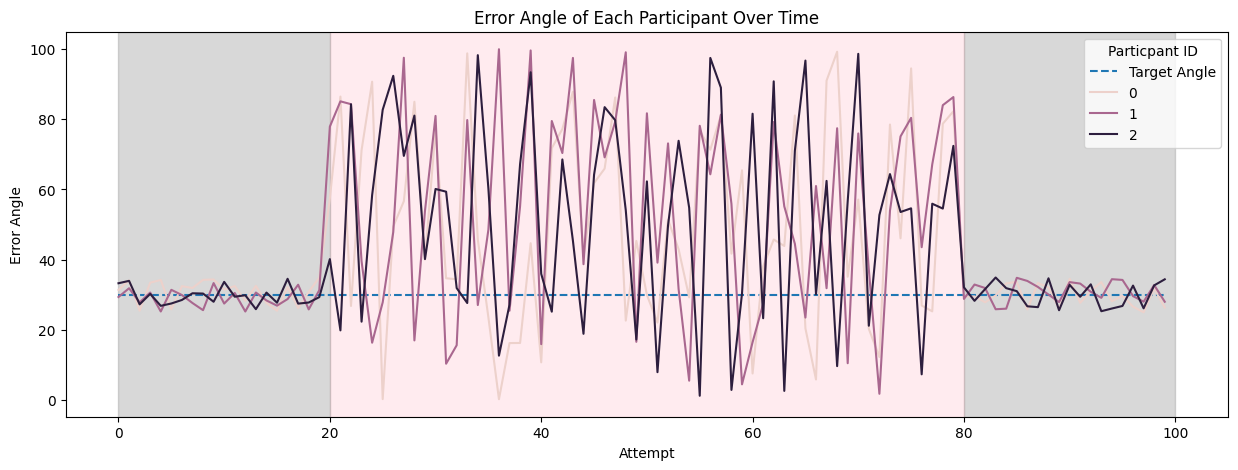

In [73]:
# For each subject, calculate the mean error angle for each session
mean_error_angles = subjects.groupby(['Particpant ID', 'Session'])['Error Angle'].mean()
plt.figure(figsize=(15, 5))
# plot the target angle for each session
plt.plot([30]*100, label='Target Angle', linestyle='--')
# Mark regions of no perturbation and sudden perturbation. 
# For each region, shade the region with a different color
experimental_condition_color_mapping= {
    'sudden': 'pink',
    'no perturbation': 'grey'
}
for region, region_limits in experimental_conditions.items():
    for region_limit in region_limits:
        plt.axvspan(region_limit[0], region_limit[1], color=experimental_condition_color_mapping[region], alpha=0.3)

sns.lineplot(x='Attempt', y='Error Angle', data=subjects, hue='Particpant ID')
plt.title('Error Angle of Each Participant Over Time')

In [65]:
# Mean error angle over all particpants for each timestep 
mean_error_angles = subjects.groupby(['Attempt'])['Error Angle'].mean()
std_error_angles = subjects.groupby(['Attempt'])['Error Angle'].std()
assert len(mean_error_angles) == len(std_error_angles)


Text(0.5, 1.0, 'Mean and Standard Deviation of Error Angle Over Time')

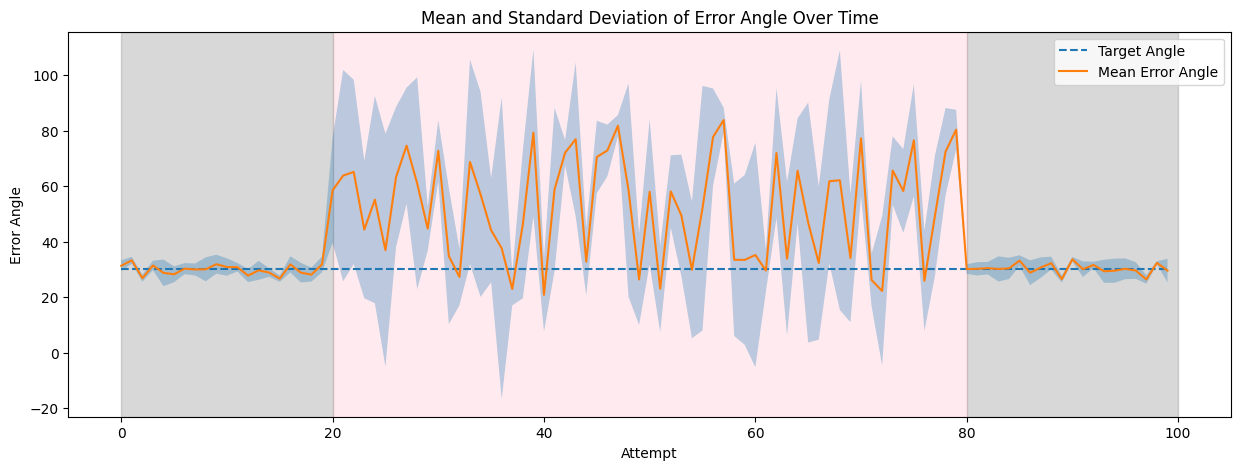

In [72]:
# Plot the mean and standard deviation of the error angle for each timestep accross particpants

plt.figure(figsize=(15, 5))
plt.plot([30]*100, label='Target Angle', linestyle='--')
for region, region_limits in experimental_conditions.items():
    for region_limit in region_limits:
        plt.axvspan(region_limit[0], region_limit[1], color=experimental_condition_color_mapping[region], alpha=0.3)
        
sns.lineplot(x='Attempt', y='Error Angle', data=mean_error_angles.reset_index(), label='Mean Error Angle')
plt.fill_between(mean_error_angles.index, mean_error_angles - std_error_angles, mean_error_angles + std_error_angles, alpha=0.3)
plt.title('Mean and Standard Deviation of Error Angle Over Time')


### Participant 

hello


## TASK-1: Implementation of recording mode and new experiment.

### Experimental Methodology

## TASK-2: Analysis of experiment on unbiased subjects

## TASK-3: Discussion of Results.

## Task-4: Independent Experments.